{'BBox': [0.1296, 0.25, 0.2546, 0.3657], 'BBox3D': [[0.1262, 0.6549, 10.1152], [0.2349, 0.6403, 11.441], [0.2611, 0.624, 10.062], [0.1393, 0.6384, 8.7362], [0.1255, 0.7623, 9.5316], [0.2401, 0.7338, 10.8574], [0.2687, 0.73, 9.4783], [0.1393, 0.7627, 8.1526]]}
[[27.2592, 74.54159999999999], [50.7384, 77.6952], [56.3976, 81.21600000000001], [30.088800000000003, 78.10560000000001], [27.108, 51.343199999999996], [51.8616, 57.4992], [58.0392, 58.31999999999999], [30.088800000000003, 51.2568]]


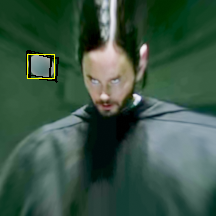

In [1]:
import tensorflow as tf
import ast
import numpy as np
import json
import PIL
from PIL import ImageDraw, ImageFont
from PIL import ImageColor
from PIL import Image as im
from PIL.ExifTags import TAGS

pic = im.open(r"C:\\Users\\Yabba\Documents\\Projects\\SeniorResearch\\OBJ2CNN\\OutputPics\\WhiteBall\\pics\\pic047.png")
#pic = im.open(r"E:\\Blender\\BlenderWork\\^CV Training Dataset Generation\\bboxTest\\pic_test.png")
#print(type(ast.literal_eval(pic.info['Note'])))
picInfo = ast.literal_eval(pic.info['Note'])

#print(picInfo['BBox'])
print(picInfo)
corners = []
for c in picInfo['BBox3D'] :
    corners.append([c[0]*pic.size[0],pic.size[1]-c[1]*pic.size[1]])
    pass

print(corners)

#rectMin = ([picInfo['BBox'][0]*pic.size[0],pic.size[1]-picInfo['BBox'][1]*pic.size[1]])
#rectMax = ([picInfo['BBox'][2]*pic.size[0],pic.size[1]-picInfo['BBox'][3]*pic.size[1]])
bb = picInfo['BBox']

draw = ImageDraw.Draw(pic)

#draw.line((0, 0) + pic.size, fill=128)
#draw.line((0, pic.size[1], pic.size[0], 0), fill=128)

for c in corners :
    draw.point(xy=c,fill=128)
    pass

cube = [[0,1],[1,2],[2,3],[3,0],[4,5],[5,6],[6,7],[7,4],[0,4],[1,5],[2,6],[3,7]]

for l in cube:
    draw.line(xy=[tuple(corners[l[0]]),tuple(corners[l[1]])], fill=2, width=2)
    pass


#print((rectMin,rectMax))

rect = (bb[0]*pic.size[0], bb[1]*pic.size[1], bb[2]*pic.size[0], bb[3]*pic.size[1],)
draw.rectangle(xy=rect,fill=None, width=1, outline='yellow')
#draw.rectangle(xy=[tuple(corners[0]),tuple(corners[5])],width=2)
#draw.rectangle(xy=[tuple(corners[3]),tuple(corners[6])],width=2)
pic.show

def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)


# create an empty image
img = tf.zeros([1, 10, 10, 3])
# draw a box around the image
box = np.array([0, 0, 1, 1])
boxes = box.reshape([1, 1, 4])
# alternate between red and blue
colors = np.array([[1.0, 0.0, 0.0], [0.0, 0.0, 1.0]])
tf.image.draw_bounding_boxes(img, boxes, colors)

#disp = im.fromarray(img)
#display(disp)
display(pic)
#display(tensor_to_image(img))




